In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [2]:
dataset = pd.read_excel('/Users/sahreenhaider/Downloads/Sample - Superstore.xls')

In [3]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
dataset['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

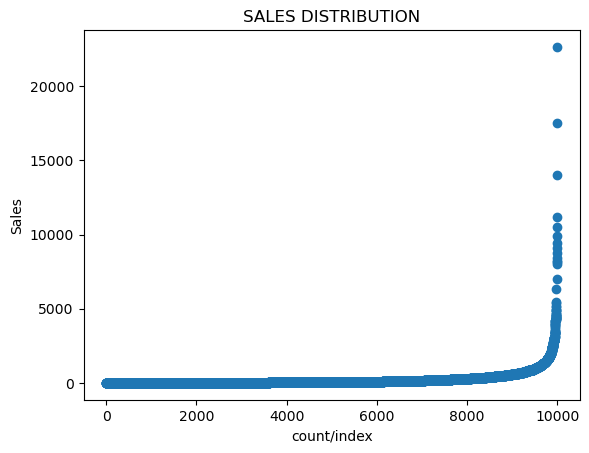

In [5]:
plt.scatter(range(dataset.shape[0]), np.sort(dataset['Sales'].values))
plt.xlabel('count/index')
plt.ylabel('Sales')
plt.title('Sales Distribution'.upper())
plt.show()

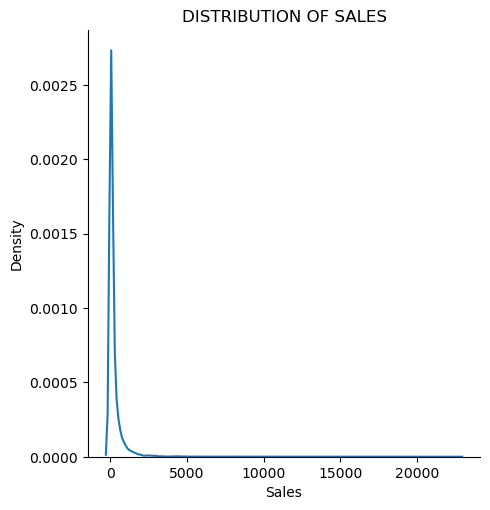

In [6]:
sns.displot(dataset["Sales"], kind='kde')
plt.title('Distribution of Sales'.upper())
plt.xlabel('Sales')
plt.show()

In [ ]:
print('skewness: \n', dataset['Sales'].skew())
print('kurtosis: \n', dataset['Sales'].kurt())

In [ ]:
dataset['Sales'].shape

In [ ]:
from sklearn.preprocessing import PowerTransformer
dataset['Sales'] = PowerTransformer().fit_transform(np.array(dataset['Sales']).reshape(9994,1))


In [ ]:
print('skewness: ',dataset['Sales'].skew())
print('kurtosis: ',dataset['Sales'].kurt())

In [ ]:
sns.displot(dataset['Sales'], kind='kde')
plt.title('Distribution of Sales')
plt.show()

In [7]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
dataset['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

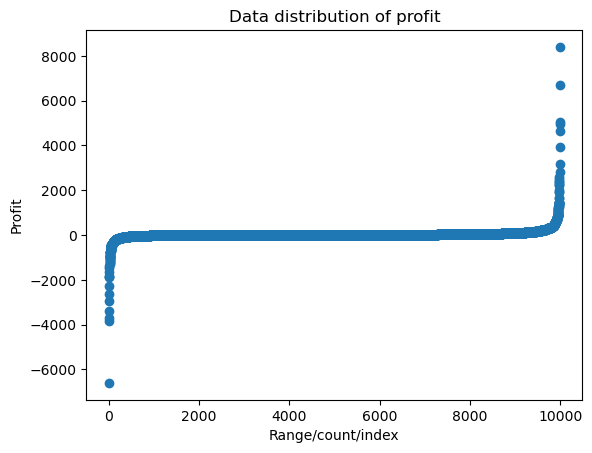

In [23]:
plt.scatter(y=sorted(dataset['Profit'].values), x=range(dataset.shape[0]))
plt.title('Data distribution of profit')
plt.xlabel('Range/count/index')
plt.ylabel('Profit')
plt.show()

Text(0.5, 1.0, 'Distribution of Profit')

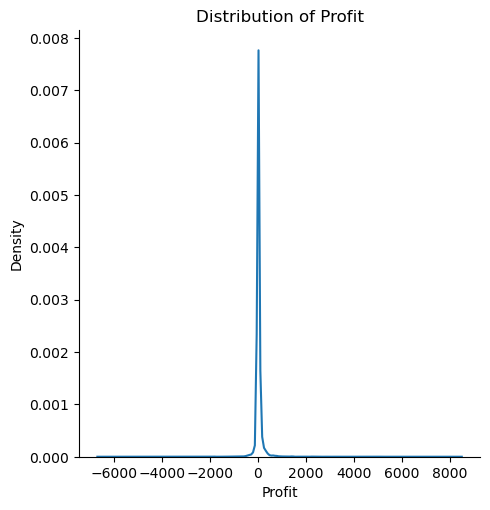

In [26]:
sns.displot(dataset['Profit'], kind='kde')
plt.title('Distribution of Profit')

In [27]:
print('skewness: ',dataset['Profit'].skew())
print('kurtosis: ',dataset['Profit'].kurt())

skewness:  7.561431562468336
kurtosis:  397.188514552414


In [35]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(dataset['Sales'].values.reshape(-1, 1))
xx = np.linspace(dataset['Sales'].min(), dataset['Sales'].max(), len(dataset)).reshape(-1, 1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

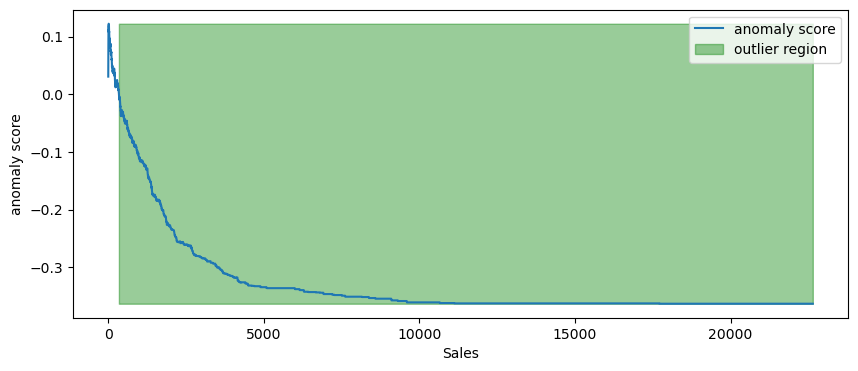

In [39]:
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='g', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

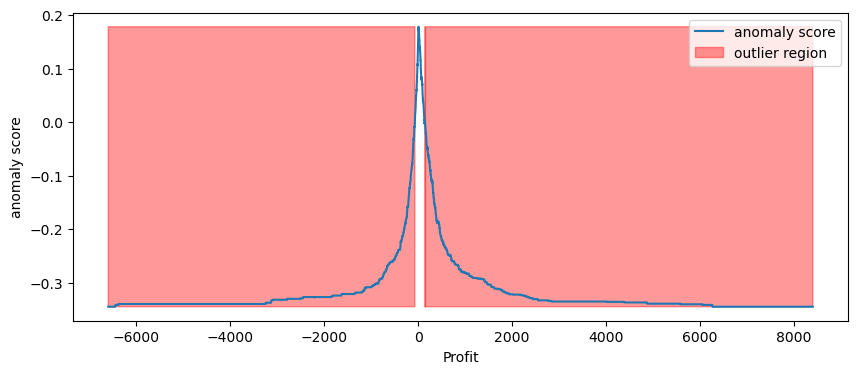

In [42]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(dataset['Profit'].values.reshape(-1, 1))
xx = np.linspace(dataset['Profit'].min(), dataset['Profit'].max(), len(dataset)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [52]:
dataset.iloc[3]

Row ID                                                       4
Order ID                                        US-2015-108966
Order Date                                 2015-10-11 00:00:00
Ship Date                                  2015-10-18 00:00:00
Ship Mode                                       Standard Class
Customer ID                                           SO-20335
Customer Name                                   Sean O'Donnell
Segment                                               Consumer
Country                                          United States
City                                           Fort Lauderdale
State                                                  Florida
Postal Code                                              33311
Region                                                   South
Product ID                                     FUR-TA-10000577
Category                                             Furniture
Sub-Category                                           

# Power Transformation